# Basic usage of the MICADO spectroscopy mode in ScopeSim

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"><br></div>

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

## Set up ScopeSim and MICADO

The following ``import`` statements are needed to run ScopeSim.

The ``pkgs_path`` value can be changed to point to the folder where you are keeping the instrument packages. If you are using the default settings, then ScopeSim will download these packages to your working directory (where this notebook is) and move them into the ``inst_pkgs/`` subdirectory.

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from astropy import units as u

import scopesim as sim
from scopesim.source import source_templates as sim_tp

%matplotlib inline

If you have not do so already, please download the relevant instrument packages using the following code in a new cell:

    sim.download_packages(
        "Armazones",
        "ELT",
        "MICADO",
    ])


## Basic on-sky source to observe

For the moment, we'll use only the most basic on-sky sources

In [3]:
src = sim_tp.empty_sky()
# src = sim_tp.star("K", 10)

## Set up MICADO for spectroscopy

We start off by importing all the configuration data with ``UserCommands``. 
Here we also specify which modes are to be used. 
To start with, we will use the 15 arcsec slit in the ``Spec_HK`` filter.

The ``set_modes`` parameter takes a list of two mode keywords: ``[<AO mode>, <slit>]``. 
- AO modes affect total system transmisison and which PSF file is used.
  - Possible values are ``SCAO``, ``MCAO``
- The slit modes difine the slit dimensions (and add the grating losses to the total transmission).
  The mode name reflects the dimensions of the slit in  [mas]:
  - Possible values are ``SPEC_3000x20``, ``SPEC_3000x50``, ``SPEC_15000x50``

Some possible combinations would be:

    set_modes=["SCAO", "SPEC_3000x20"]
    set_modes=["MCAO", "SPEC_3000x50"]
    set_modes=["SCAO", "SPEC_15000x50"]



In [4]:
cmd = sim.UserCommands(use_instrument="MICADO", set_modes=["SCAO", "SPEC_15000x50"])
micado = sim.OpticalTrain(cmd)

For testing purposes it maybe useful to only simulate a certain sub-window on the focal plane. 

If we want to simulate the full detector array, we need to exclude the ``detector_window`` effect, and include the ``full_detector_array`` effect. 

Naturally the execution time is dependent on whether we want to simulate only a small fraction of the focal plane, or the full thing.

In [5]:
USE_FULL_DETECTOR = False
micado["full_detector_array"].include = USE_FULL_DETECTOR
micado["detector_window"].include = not USE_FULL_DETECTOR

To check which detector configuration is currently used, we can print the table of effects with ``micado.effects``

In [6]:
micado.effects

element,name,class,included
str11,str27,str24,bool
armazones,skycalc_atmosphere,SkycalcTERCurve,True
ELT,telescope_reflection,SurfaceList,True
MICADO,micado_static_surfaces,SurfaceList,True
MICADO,micado_ncpas_psf,NonCommonPathAberration,True
MICADO,filter_wheel_1 : [Spec_HK],FilterWheel,True
MICADO,filter_wheel_2 : [open],FilterWheel,True
MICADO,pupil_wheel : [open],FilterWheel,True
MICADO_DET,full_detector_array,DetectorList,False
MICADO_DET,detector_window,DetectorWindow,True


## Observe the on-sky source with a 15000x50 slit in the Spec_HK filter

Running the simulation involves first ``observe()``ing the object, then ``readout()``ing the detectors.

    micado.observe(src)
    micado.readout()
    
``observe()`` does not produce any output, although it is possible to access (and save) the intermediate focal plane image.

``readout()`` returns a list of ``fits.HDUList`` object to the ipython session. 

By providing the ``filename`` keyword, the result can also be saved to disk: ``micado.readout(filename="spec_temp.fits")``

In [7]:
# Warning, this takes about 3 minutes to complete
micado.observe(src)

INFO - emission not found in either '.meta' or '.table': [ELT]
INFO - emission not found in either '.meta' or '.table': [I00_EntrWin]
INFO - emission not found in either '.meta' or '.table': [I09_SCAO_PO]
INFO - emission not found in either '.meta' or '.table': [I01_Fold1]
INFO - emissivity not found in either '.meta' or '.table': [I01_Fold1]
INFO - transmission not found in either '.meta' or '.table': [I01_Fold1]
INFO - emission not found in either '.meta' or '.table': [I02_Coli1]
INFO - emissivity not found in either '.meta' or '.table': [I02_Coli1]
INFO - transmission not found in either '.meta' or '.table': [I02_Coli1]
INFO - emission not found in either '.meta' or '.table': [I03_Coli2]
INFO - emissivity not found in either '.meta' or '.table': [I03_Coli2]
INFO - transmission not found in either '.meta' or '.table': [I03_Coli2]
INFO - emission not found in either '.meta' or '.table': [I04_Coli3]
INFO - emissivity not found in either '.meta' or '.table': [I04_Coli3]
INFO - transmiss

INFO - Waverange does not overlap with Spectrum waveset: [14459.999999999996, 14499.999999999996] <> [ 7000.          7057.77705817  7085.38850061  7165.69172596
  7185.16584771  7275.25642823  7286.34827217  7386.4963943
  7388.95556048  7493.00777774  7499.43723926  7598.52527164
  7614.10496985  7705.52867638  7730.52599046  7814.03891675
  7848.7271092   7924.07721221  7968.73554409  8035.66508101
  8090.57892931  8148.82434446  8214.28532159  8263.57713113
  8339.88320663  8379.94588121  8467.40150569  8497.95335092
  8596.86958225  8617.62261692  8728.31724875  8738.97708082
  8861.77477348  8862.0404738   8986.83686122  8997.27288752
  9113.39064734  9134.84279184  9241.72658005  9274.5161645
  9371.86975579  9416.32516789  9503.84562437  9560.30245619
  9600.          9610.          9637.67999401  9706.48118286
  9773.39903636  9854.89500829  9911.02929163 10005.57810754
 10050.59767375 10158.5651782  10192.13147568 10313.8914484
 10335.65837471 10471.59268494 10481.2064379  10

INFO - Waverange does not overlap with Spectrum waveset: [14459.999999999996, 14499.999999999996] <> [ 7000.          7057.77705817  7165.69172596  7275.25642823
  7386.4963943   7499.43723926  7614.10496985  7730.52599046
  7848.7271092   7968.73554409  8090.57892931  8214.28532159
  8339.88320663  8467.40150569  8596.86958225  8728.31724875
  8861.77477348  8997.27288752  9134.84279184  9274.5161645
  9416.32516789  9560.30245619  9706.48118286  9854.89500829
 10005.57810754 10158.5651782  10313.8914484  10471.59268494
 10631.70520145 10794.26586686 10959.31211377 11126.88194719
 11297.01395319 11469.74730786 11645.12178627 11823.17777169
 12003.95626482 12187.49889329 12373.84792123 12563.04625899
 12755.13747302 12950.16579591 13148.17613658 13349.21409061
 13553.32595075 13760.55871758 13970.9601103  14184.57857778
 14401.46330966 14621.6642477  14845.23209729 15072.21833911
 15302.67524097 15536.6558699  15774.2141043  16015.4046464
 16260.28303483 16508.90565741 16761.32976416 1

INFO - Waverange does not overlap with Spectrum waveset: [14459.999999999996, 14499.999999999996] <> [ 7000.          7070.52282746  7169.90922239  7180.
  7270.69263643  7372.89270669  7476.52934633  7581.62274839
  7688.19338978  7796.26203522  7830.          7905.84974132
  8016.97786067  8129.668046    8243.9422544   8359.82275159
  8390.          8477.33211629  8596.49324457  8717.32935435
  8839.86398992  8964.1210265   8980.          9090.12467493
  9217.89948634  9347.470357    9478.86253311  9490.
  9612.10161573  9747.2135658   9884.22470919 10000.
 10023.16174178 10164.05173473 10306.92213971 10451.80079427
 10580.         10598.71592725 10747.6961643  10898.77053343
 11051.96847068 11207.31982587 11360.         11364.8548684
 11524.60429313 11686.59922641 11850.8712321  11990.
 12017.45231772 12186.37494073 12357.67201482 12531.37691631
 12707.52349071 12880.         12886.14605922 13067.27942554
 13250.95888254 13437.22021919 13626.09972755 13817.63420978
 13830.         1

Change ``dit`` and ``ndit`` to whatever we want the exposure time to be:

In [8]:
micado.cmds["!OBS.dit"] = 3600
micado.cmds["!OBS.ndit"] = 1

hdul = micado.readout()

### Checking the intermediate output

We can check the intermediate (noise-less) focal plane image by looking at the ``micado.image_planes[0]`` ``ImageHDU`` object:

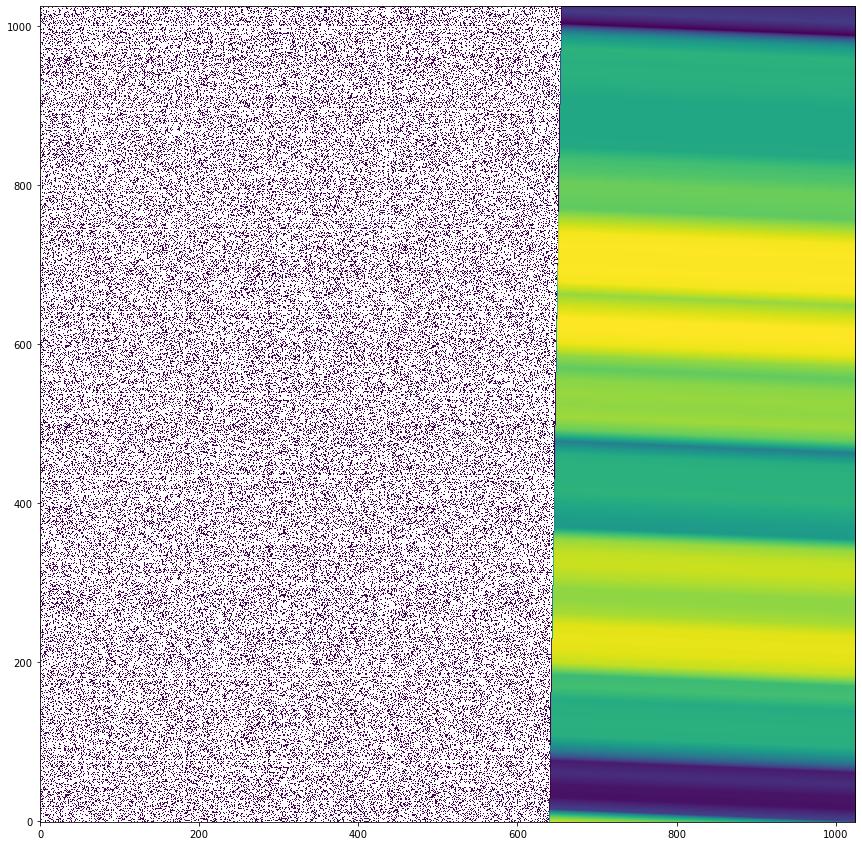

In [9]:
plt.figure(figsize=(15,15))
plt.imshow(micado.image_planes[0].data, norm=LogNorm(), origin="lower")

### Checking the final output

Now we plot the noisy detector readouts

In [10]:
if USE_FULL_DETECTOR:
    plt.figure(figsize=(15,15))
    for i in range(1,10):
        plt.subplot(3,3,i)
        plt.imshow(hdul[0][i].data, norm=LogNorm(), origin="lower")

## Observe the on-sky source with a 3000x20 slit in the Spec_IJ filter

To change modes, we need to create a new model of MICADO.

The filter is set by default to the ``Spec_HK`` filter, located in filter wheel 1.

To change the filter to the ``"Spec_IJ"`` or ``"J"`` filter, we should use the setting: ``cmd["!OBS.filter_name_fw1"] = "Spec_IJ"``

In [11]:
cmd = sim.UserCommands(use_instrument="MICADO", set_modes=["SCAO", "SPEC_3000x20"])
cmd["!OBS.filter_name_fw1"] = "Spec_IJ"

micado = sim.OpticalTrain(cmd)

USE_FULL_DETECTOR = False
micado["full_detector_array"].include = USE_FULL_DETECTOR
micado["detector_window"].include = not USE_FULL_DETECTOR

In [12]:
micado.observe(src)

INFO - emission not found in either '.meta' or '.table': [ELT]
INFO - emission not found in either '.meta' or '.table': [I00_EntrWin]
INFO - emission not found in either '.meta' or '.table': [I09_SCAO_PO]
INFO - emission not found in either '.meta' or '.table': [I01_Fold1]
INFO - emissivity not found in either '.meta' or '.table': [I01_Fold1]
INFO - transmission not found in either '.meta' or '.table': [I01_Fold1]
INFO - emission not found in either '.meta' or '.table': [I02_Coli1]
INFO - emissivity not found in either '.meta' or '.table': [I02_Coli1]
INFO - transmission not found in either '.meta' or '.table': [I02_Coli1]
INFO - emission not found in either '.meta' or '.table': [I03_Coli2]
INFO - emissivity not found in either '.meta' or '.table': [I03_Coli2]
INFO - transmission not found in either '.meta' or '.table': [I03_Coli2]
INFO - emission not found in either '.meta' or '.table': [I04_Coli3]
INFO - emissivity not found in either '.meta' or '.table': [I04_Coli3]
INFO - transmiss

WARNING - Spectral trace footprint is outside FoV
INFO - Waverange does not overlap with Spectrum waveset: [7999.999999999999, 9300.000099999997] <> [ 7000. 25000.] for spectrum SourceSpectrum at z=0.0
Model: Empirical1D
N_inputs: 1
N_outputs: 1
Parameters: 
  points: (array([ 7000., 25000.]),)
  lookup_table: [0. 0.]
  method: linear
  fill_value: 0
  bounds_error: False
INFO - Waverange does not overlap with Spectrum waveset: [7999.999999999999, 9200.000199999999] <> [ 7000. 25000.] for spectrum SourceSpectrum at z=0.0
Model: Empirical1D
N_inputs: 1
N_outputs: 1
Parameters: 
  points: (array([ 7000., 25000.]),)
  lookup_table: [0. 0.]
  method: linear
  fill_value: 0
  bounds_error: False
INFO - Waverange does not overlap with Spectrum waveset: [7999.999999999999, 8199.999899999999] <> [ 7000. 25000.] for spectrum SourceSpectrum at z=0.0
Model: Empirical1D
N_inputs: 1
N_outputs: 1
Parameters: 
  points: (array([ 7000., 25000.]),)
  lookup_table: [0. 0.]
  method: linear
  fill_value:

In [13]:
micado.cmds["!OBS.dit"] = 10 * 3600
hdul = micado.readout()

### Checking the intermediate output

We can check the intermediate (noise-less) focal plane image by looking at the ``micado.image_planes[0]`` ``ImageHDU`` object:

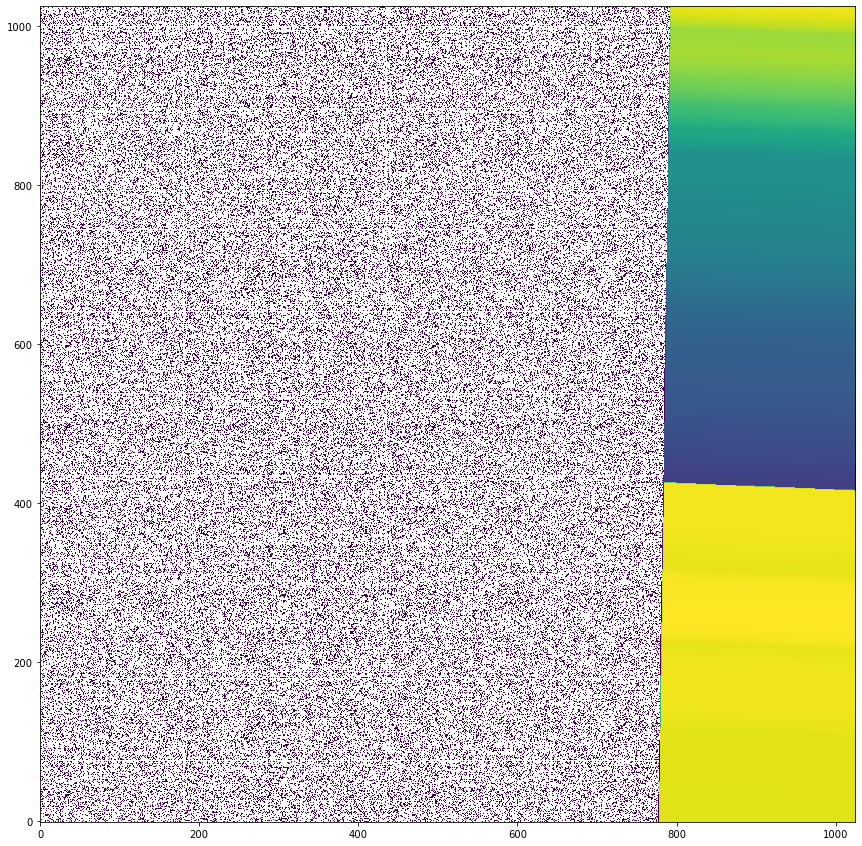

In [14]:
plt.figure(figsize=(15,15))
plt.imshow(micado.image_planes[0].data, norm=LogNorm(), origin="lower")

### Checking the final output

Now we plot the noisy detector readouts

In [15]:
if USE_FULL_DETECTOR:
    plt.figure(figsize=(15,15))
    for i in range(1,10):
        plt.subplot(3,3,i)
        im = hdul[0][i].data
        plt.imshow(im, norm=LogNorm(), origin="lower", vmin=0.99*np.median(im), vmax=1.1*np.median(im))

## Saving to disk

All the returned objects are from the ``astropy.io.fits`` library, and can therefore be saved to disk in the usual manner:

In [16]:
micado.image_planes[0].hdu.writeto("intermediate_data.fits", overwrite=True)
hdul[0].writeto("detector_readout_data.fits", overwrite=True)